In [1]:
"""
  Only execute the commented code in Google Colaboratory to download the dataset in a zip file
"""
! gdown --id 1-ySD5q7lZwgjsYHdbPgbqM7bff0M5MGB
from zipfile import ZipFile
with ZipFile("/content/EuroSAT_dataset.zip", 'r') as zip:
  zip.extractall("/content/dataset")

Downloading...
From: https://drive.google.com/uc?id=1-ySD5q7lZwgjsYHdbPgbqM7bff0M5MGB
To: /content/EuroSAT_dataset.zip
100% 69.8M/69.8M [00:00<00:00, 192MB/s]


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import tensorflow.keras

from matplotlib import pyplot as plt
import numpy as np

In [8]:
size = 64
batch_size = 15
base_dir = "/content/dataset/EuroSAT_dataset"

train_data_dir = base_dir
validation_data_dir = train_data_dir
LABELS = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"]
# LABELS = ["Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "Residential", "River"]

In [9]:
# DATA SOURCE --------------------------------------------------

train_datagen = ImageDataGenerator(
        validation_split = 0.2,
        rescale=1./255,
        rotation_range = 180,
        horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(size, size),
        batch_size=batch_size,
        class_mode='categorical',
        subset = "training",
        classes = LABELS,
        seed = 2022
)

validation_datagen = ImageDataGenerator(
        validation_split = 0.2,
        rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(size, size),
        batch_size=batch_size,
        class_mode='categorical',
        subset = "validation",
        classes = LABELS,
        seed = 2022
)

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


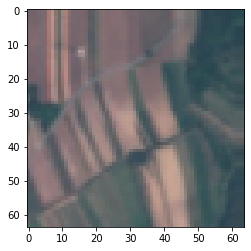

In [10]:
# Visualization of the last image of the first batch
image = np.array(train_generator[0][0][7], dtype='float')
plt.imshow(image)
plt.show()

In [11]:
# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(size, size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(160, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(Conv2D(256, (5, 5), activation='relu'))
# model.add(Dropout(0.05))

model.add(Flatten())
# model.add(Dense(128, activation='relu'))
model.add(Dense(96, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(learning_rate=0.7),
              metrics=['accuracy'])

In [12]:
# TRAINING --------------------------------------------------

epochs = 25

early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=8, restore_best_weights=True)

histogram = model.fit(
        train_generator,
        validation_data = validation_generator,
        epochs=epochs,
        callbacks = [early_stop]
)

Epoch 1/25
1067/1067 [==============================] - 47s 42ms/step - loss: 1.8381 - accuracy: 0.2758 - val_loss: 1.5081 - val_accuracy: 0.4013
Epoch 2/25
1067/1067 [==============================] - 45s 42ms/step - loss: 1.3618 - accuracy: 0.5042 - val_loss: 1.0658 - val_accuracy: 0.6217
Epoch 3/25
1067/1067 [==============================] - 44s 41ms/step - loss: 1.0823 - accuracy: 0.6205 - val_loss: 1.4057 - val_accuracy: 0.5230
Epoch 4/25
1067/1067 [==============================] - 45s 42ms/step - loss: 0.9480 - accuracy: 0.6674 - val_loss: 0.8958 - val_accuracy: 0.7070
Epoch 5/25
1067/1067 [==============================] - 44s 41ms/step - loss: 0.8444 - accuracy: 0.7070 - val_loss: 0.7192 - val_accuracy: 0.7377
Epoch 6/25
1067/1067 [==============================] - 44s 42ms/step - loss: 0.7852 - accuracy: 0.7296 - val_loss: 0.7182 - val_accuracy: 0.7530
Epoch 7/25
1067/1067 [==============================] - 43s 41ms/step - loss: 0.7120 - accuracy: 0.7560 - val_loss: 0.7694 -

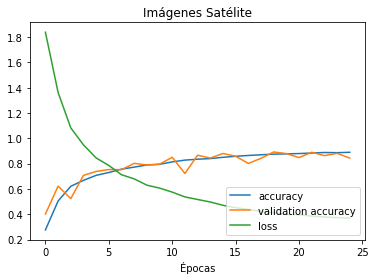

In [13]:
# VISUALIZATION OF TRAINING METRICS --------------------------------------------------

plt.plot(histogram.history['accuracy'], label='accuracy')
plt.plot(histogram.history['val_accuracy'], label='validation accuracy')
plt.plot(histogram.history['loss'], label='loss')

plt.title('Imágenes Satélite')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()